# 1.Linear Regreesion
### 공부시간에 따른 시험점수

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dateset = pd.read_csv('LinearRegressionData.csv')

In [4]:
dateset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [6]:
X = dateset.iloc[:,:-1].values #처음부터 마지막 빼고 전부
y = dateset.iloc[:,-1].values #마지막 만

In [7]:
X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() #객체 생성
reg.fit(X,y) #학습

LinearRegression()

In [12]:
y_pred = reg.predict(X)
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

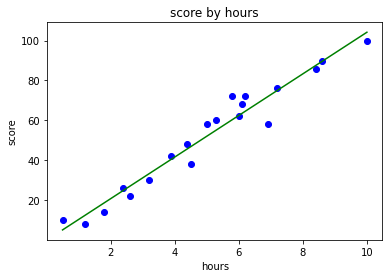

In [14]:
plt.scatter(X,y,color='blue') # 산점도 그래프
plt.plot(X,y_pred,color='green') # 선형 그래프
plt.title('score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [18]:
print("9시간 공부했을 때 예상 점수 : ",reg.predict([[9]])) # dateset이 2차원이라 2차원 배열의 형태로 데이터 입력
print("9,8시간 공부했을 때 예상 점수 : ",reg.predict([[9],[8]])) # 여러개

9시간 공부했을 때 예상 점수 :  [93.77478776]
9,8시간 공부했을 때 예상 점수 :  [93.77478776 83.33109082]


In [19]:
reg.coef_ #기울기

array([10.44369694])

In [21]:
reg.intercept_ #y 절편

-0.218484702867201

### 결과 : Y = 10.4x - 0.2

---
### 데이터 set 분리

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
dateset = pd.read_csv('LinearRegressionData.csv')
dateset

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [24]:
X = dateset.iloc[:,:-1].values
y = dateset.iloc[:,-1].values

In [25]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0 ) 
# test_size는 20퍼 8:2로 니늠 random_state = 0 랜덤으로 뽑음

In [28]:
X, len(X)

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [31]:
X_train, len(X_train)

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [34]:
X_test, len(X_test)

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [35]:
y_train, len(y_train)

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62]), 16)

### 분리된 모델을 통한 모델링

In [36]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train) # 훈련set으로 모델링

LinearRegression()

### 데이터 시각화 (Train)

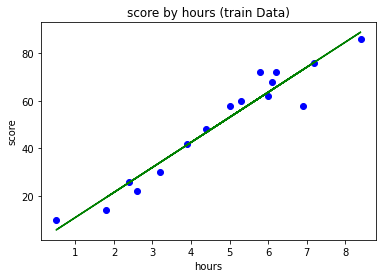

In [38]:
plt.scatter(X_train,y_train,color='blue') # 산점도 그래프
plt.plot(X_train,reg.predict(X_train),color='green') # 선형 그래프
plt.title('score by hours (train Data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화 (Test)

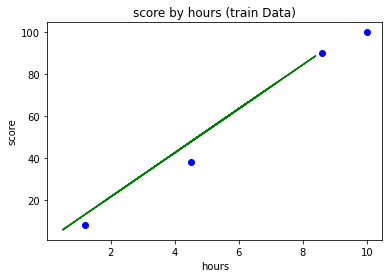

In [39]:
plt.scatter(X_test,y_test,color='blue') # 산점도 그래프
plt.plot(X_train,reg.predict(X_train),color='green') # 선형 그래프
plt.title('score by hours (train Data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 모델 평가

In [42]:
reg.score(X_test,y_test) #테스트 set의 모델 평가

0.9727616474310156

In [43]:
reg.score(X_train,y_train) # Train set의 모델 평가

0.9356663661221668